# 3D complex inversion from 2D lines
Carbonate precipitation is a process that can be used to consolidate soils. The precipitation of carbonate in the ground can be followed using geophysical methods. Induced polarisation (IP) has proven useful for this. In this dataset, the 3D distribution of carbonate precipitation is inferred from field time-domain IP data. See [Sina et al. (200X)](https://doi.org/) for more details.

In [2]:
 # trick to import a resipy from a local copy (you won't need that if you `pip install resipy`)
import sys 
sys.path.append('../src')

from resipy import R2
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

datadir = '../src/examples/dc-2d-timelapse/data/'

In [3]:
k = R2(typ='cR3t')
k.create3DSurvey(datadir, lineSpacing=2, zigzag=False, 
                 name='mergedSurvey', ftype='Syscal')

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
308/344 reciprocal measurements found.
0 measurements error > 20 %
308/344 reciprocal measurements found.
0 measurements error > 20 %
308/344 reciprocal measurements found.
0 measurements error > 20 %
266/314 reciprocal measurements found.
0 measurements error > 20 %


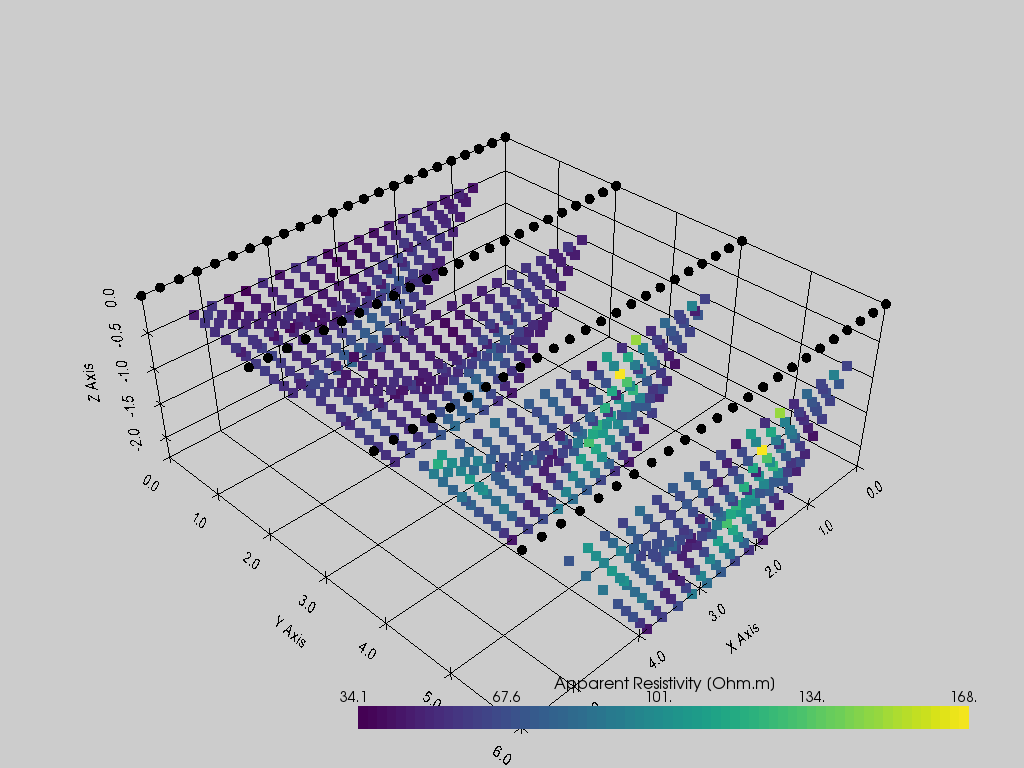

In [5]:
k.showPseudo(threed=True)

Creating tetrahedral mesh...fmd in gmshWrap.py: 2.770128
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/resipy/src/resipy/invdir

Reading mesh3d.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 15498 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
interpolating topography onto mesh using triangulate interpolation...done
Done
ResIPy Estimated RAM usage = 0.184715 Gb
done


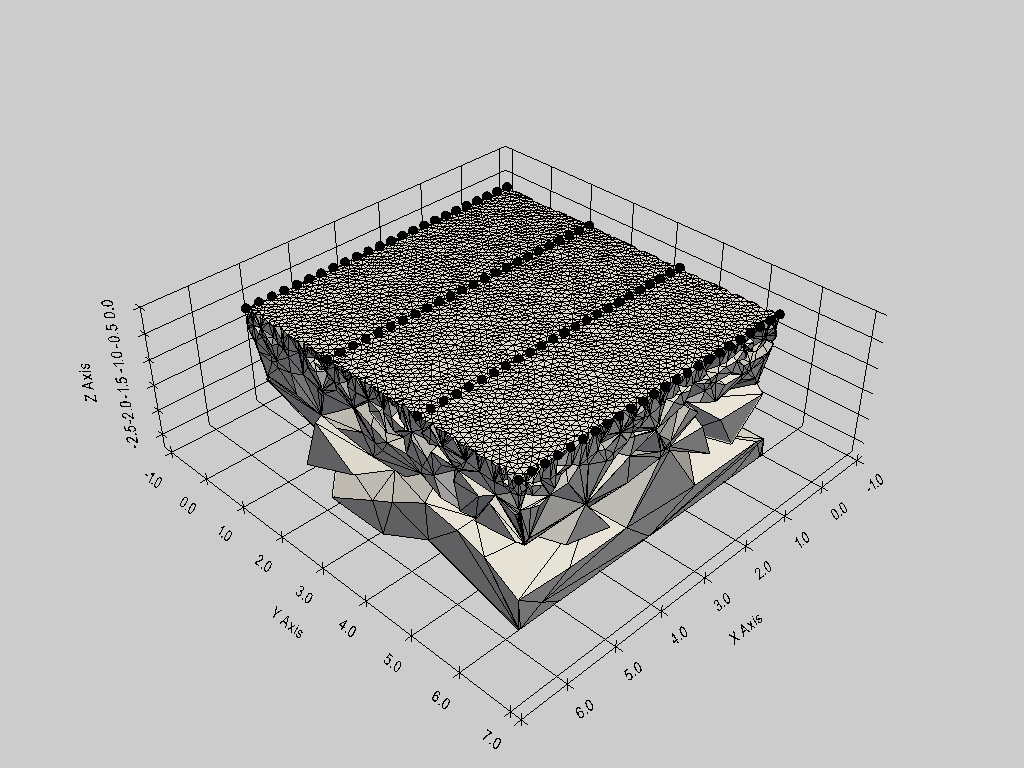

In [9]:
k.createMesh(cl_factor=50)
k.showMesh()

In [10]:
k.invert()

Writing .in file and protocol.dat... 

divide by zero encountered in log10


done!
--------------------- MAIN INVERSION ------------------


 >> c R 3 t     C o m p l e x   R e s i s t i v i t y    M o d e l    v1.0 <<

 >> Date: 01-09-2020
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from res0.dat            
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> Memory estimates:
    For   1000 measurements the memory needed is:           0.48 Gb
    For   2000 measurements the memory needed is:           0.94 Gb
    For   5000 measurements the memory needed is:           2.32 Gb
    For  10000 measurements the memory needed is:           4.61 Gb

 Measurements read:   751  Measurements rejected:    0
 Geometric mean of apparen

Index(['param', 'elm_id', 'region', 'cellType', 'X', 'Y', 'Z',
       'Magnitude(ohm.m)', 'Phase(mrad)', 'Magnitude(log10)',
       'Sigma_real(log10)', 'Sigma_imag(log10)', 'Sensitivity_map(log10)',
       'Parameter_zones', 'Conductivity(mS/m)', 'Chargeability(mV/V)'],
      dtype='object')


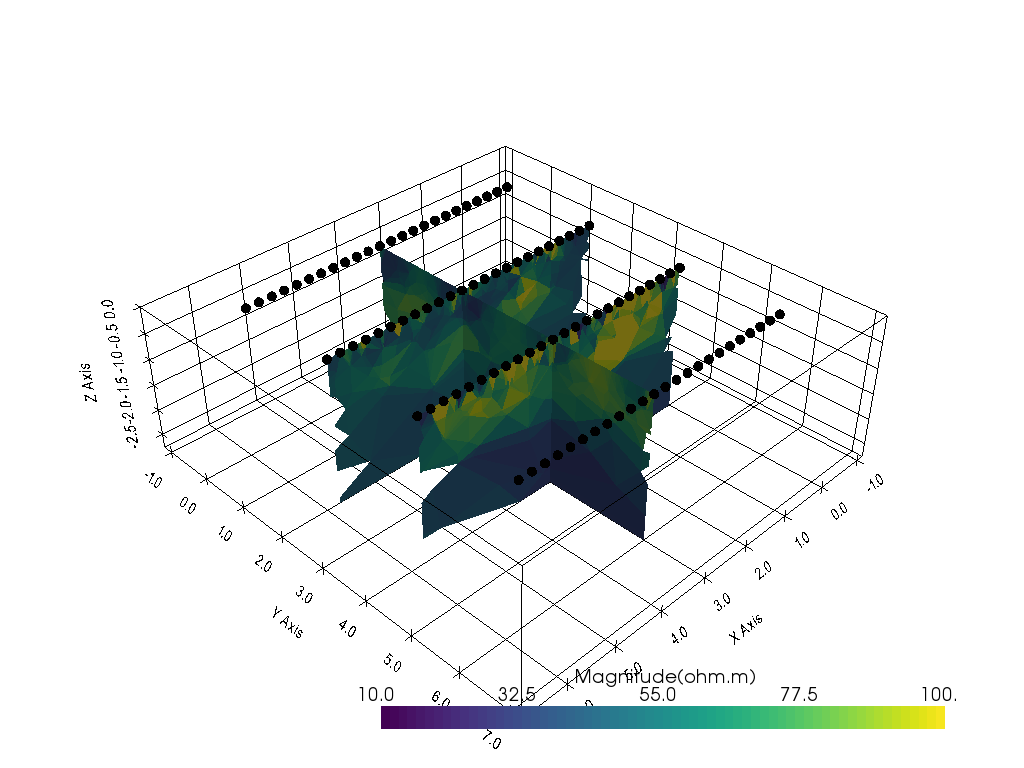

In [18]:
print(k.meshResults[0].df.columns) # view attributes available
k.showResults(attr='Magnitude(ohm.m)', pvslices=[[3],[2,4],[0]], vmin=10, vmax=100,
             background_color=(1,1,1))

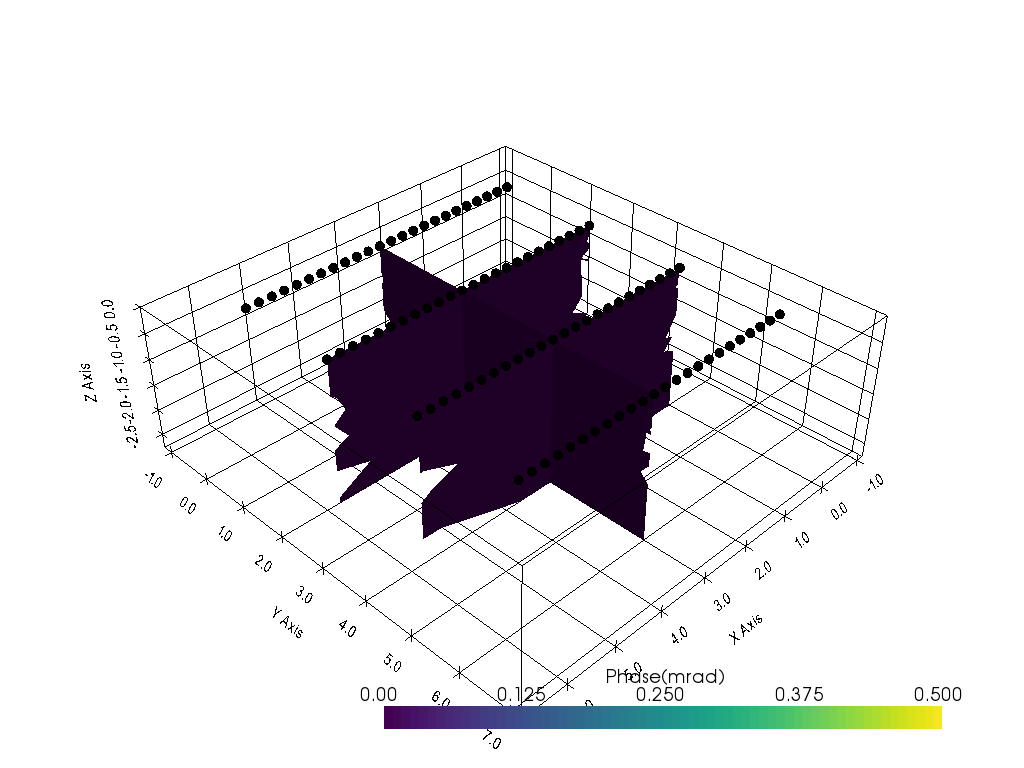

In [22]:
k.showResults(attr='Phase(mrad)', pvslices=[[3],[2,4],[0]],
             background_color=(1,1,1), vmin=0, vmax=0.5)